In [1]:
# Install required libraries
!pip install spacy nltk matplotlib
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 44.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [15]:
import nltk, spacy, re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import word_tokenize, sent_tokenize, pos_tag, FreqDist
import matplotlib.pyplot as plt

In [16]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [33]:
# Text
text = """Artificial intelligence (AI) is intelligence demonstrated by machines,
as opposed to the natural intelligence displayed by animals including humans.
Leading AI research companies include OpenAI, Google DeepMind, and Anthropic.
In 2025, Microsoft invested billions of dollars into AI infrastructure
to support advancements in natural language processing and robotics.
AI applications are used in healthcare, finance, transportation, and education worldwide."""

print("Original Text:\n", text)

Original Text:
 Artificial intelligence (AI) is intelligence demonstrated by machines, 
as opposed to the natural intelligence displayed by animals including humans. 
Leading AI research companies include OpenAI, Google DeepMind, and Anthropic. 
In 2025, Microsoft invested billions of dollars into AI infrastructure 
to support advancements in natural language processing and robotics. 
AI applications are used in healthcare, finance, transportation, and education worldwide.


In [26]:
# Part 1: Text Cleaning
text_clean = text.lower()  # lowercase
text_clean = re.sub(r'[{}0-9]'.format(string.punctuation), ' ', text_clean)  # remove punctuation and digits
text_clean = re.sub(r'\s+', ' ', text_clean).strip()  # remove extra spaces

print("\nCleaned Text:\n", text_clean)


Cleaned Text:
 artificial intelligence ai is intelligence demonstrated by machines as opposed to the natural intelligence displayed by animals including humans leading ai research companies include openai google deepmind and anthropic in microsoft invested billions of dollars into ai infrastructure to support advancements in natural language processing and robotics ai applications are used in healthcare finance transportation and education worldwide


In [27]:
# Part 2: Tokenization
sent_tokens = sent_tokenize(text_clean)
word_tokens = word_tokenize(text_clean)

print("\nSentence Tokens:\n", sent_tokens)
print("\nWord Tokens:\n", word_tokens)


Sentence Tokens:
 ['artificial intelligence ai is intelligence demonstrated by machines as opposed to the natural intelligence displayed by animals including humans leading ai research companies include openai google deepmind and anthropic in microsoft invested billions of dollars into ai infrastructure to support advancements in natural language processing and robotics ai applications are used in healthcare finance transportation and education worldwide']

Word Tokens:
 ['artificial', 'intelligence', 'ai', 'is', 'intelligence', 'demonstrated', 'by', 'machines', 'as', 'opposed', 'to', 'the', 'natural', 'intelligence', 'displayed', 'by', 'animals', 'including', 'humans', 'leading', 'ai', 'research', 'companies', 'include', 'openai', 'google', 'deepmind', 'and', 'anthropic', 'in', 'microsoft', 'invested', 'billions', 'of', 'dollars', 'into', 'ai', 'infrastructure', 'to', 'support', 'advancements', 'in', 'natural', 'language', 'processing', 'and', 'robotics', 'ai', 'applications', 'are',

In [29]:
# Part 3: Stopword Removal
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in word_tokens if w not in stop_words]

print("\nWord Count Before:", len(word_tokens))
print("Word Count After Stopword Removal:", len(filtered_tokens))
print("Filtered Tokens:\n", filtered_tokens)


Word Count Before: 58
Word Count After Stopword Removal: 42
Filtered Tokens:
 ['artificial', 'intelligence', 'ai', 'intelligence', 'demonstrated', 'machines', 'opposed', 'natural', 'intelligence', 'displayed', 'animals', 'including', 'humans', 'leading', 'ai', 'research', 'companies', 'include', 'openai', 'google', 'deepmind', 'anthropic', 'microsoft', 'invested', 'billions', 'dollars', 'ai', 'infrastructure', 'support', 'advancements', 'natural', 'language', 'processing', 'robotics', 'ai', 'applications', 'used', 'healthcare', 'finance', 'transportation', 'education', 'worldwide']


In [30]:
# Part 4: Stemming & Lemmatization
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

print("\nStemming & Lemmatization Comparison (10 words or less):")
for w in filtered_tokens[:10]:
    print(f"{w} --> Stem: {ps.stem(w)} | Lemma: {lemmatizer.lemmatize(w)}")

print("\nNOTE: Lemmatization gives real dictionary words (better for meaningful text)")


Stemming & Lemmatization Comparison (10 words or less):
artificial --> Stem: artifici | Lemma: artificial
intelligence --> Stem: intellig | Lemma: intelligence
ai --> Stem: ai | Lemma: ai
intelligence --> Stem: intellig | Lemma: intelligence
demonstrated --> Stem: demonstr | Lemma: demonstrated
machines --> Stem: machin | Lemma: machine
opposed --> Stem: oppos | Lemma: opposed
natural --> Stem: natur | Lemma: natural
intelligence --> Stem: intellig | Lemma: intelligence
displayed --> Stem: display | Lemma: displayed

NOTE: Lemmatization gives real dictionary words (better for meaningful text)



POS Tags:
 [('artificial', 'JJ'), ('intelligence', 'NN'), ('ai', 'JJ'), ('intelligence', 'NN'), ('demonstrated', 'VBD'), ('machines', 'NNS'), ('opposed', 'VBN'), ('natural', 'JJ'), ('intelligence', 'NN'), ('displayed', 'VBD'), ('animals', 'NNS'), ('including', 'VBG'), ('humans', 'NNS'), ('leading', 'VBG'), ('ai', 'JJ'), ('research', 'NN'), ('companies', 'NNS'), ('include', 'VBP'), ('openai', 'JJ'), ('google', 'NN'), ('deepmind', 'NN'), ('anthropic', 'NN'), ('microsoft', 'RB'), ('invested', 'VBD'), ('billions', 'NNS'), ('dollars', 'NNS'), ('ai', 'VBP'), ('infrastructure', 'NN'), ('support', 'NN'), ('advancements', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN'), ('robotics', 'NNS'), ('ai', 'VBP'), ('applications', 'NNS'), ('used', 'VBD'), ('healthcare', 'NN'), ('finance', 'NN'), ('transportation', 'NN'), ('education', 'NN'), ('worldwide', 'NN')]


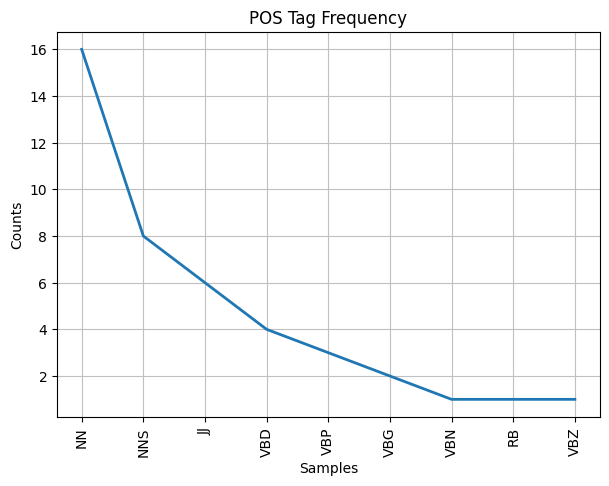

In [31]:
# Part 5: POS Tagging
pos_tags = pos_tag(filtered_tokens)
print("\nPOS Tags:\n", pos_tags)

fdist = FreqDist(tag for word, tag in pos_tags)
plt.figure(figsize=(7,5))
fdist.plot(30, cumulative=False)
plt.title("POS Tag Frequency")
plt.show()


Named Entities:
Leading AI --> ORG
OpenAI --> ORG
Google DeepMind --> PRODUCT
2025 --> DATE
Microsoft --> ORG
billions of dollars --> MONEY
AI --> GPE


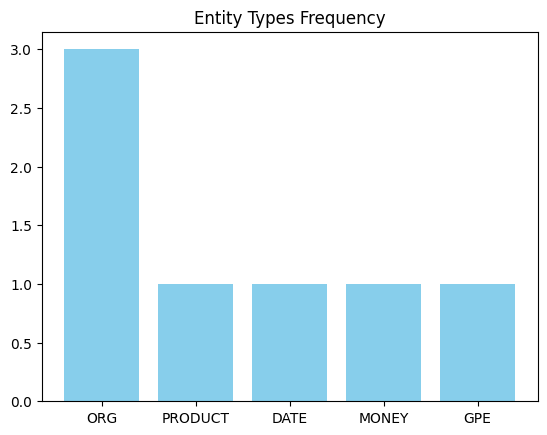

In [34]:
# Part 6: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} --> {ent.label_}")

from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

entity_freq = {}
for ent in doc.ents:
    entity_freq[ent.label_] = entity_freq.get(ent.label_, 0) + 1

plt.bar(entity_freq.keys(), entity_freq.values(), color='skyblue')
plt.title("Entity Types Frequency")
plt.show()